<AxesSubplot:xlabel='date'>

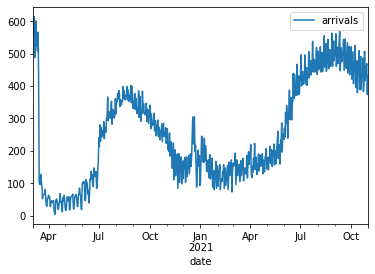

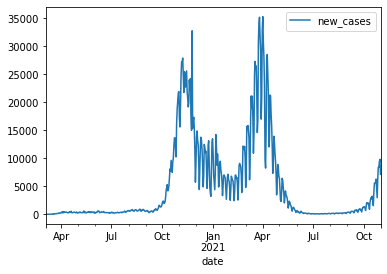

In [13]:
import pandas

arrivals = pandas.read_csv('arrivals-per-day.csv')
cases = pandas.read_csv('covid_poland.csv')
cases = cases.filter(['date', 'new_cases'])

# v = arrivals.merge(cases[['date', 'new_cases']]).groupby(arrivals.columns.tolist()).exp().apply(pandas.Series.tolist)

# df = pandas.DataFrame(v.tolist(), index=v.index).rename(columns=lambda x: x + 1).add_prefix('exp loc').reset_index()

merged = arrivals.merge(cases, on='date')

merged = merged.filter(['date', 'arrivals', 'new_cases'])
merged['date'] = pandas.to_datetime(merged['date'])
merged['new_cases'] = merged['new_cases'].astype(int)
merged.to_csv('merged_data.csv', index=False)

merged.plot(x = 'date', y = 'arrivals')
merged.plot(x = 'date', y = 'new_cases')
